# MOVIE GENRE CLASSIFICAITON USING SENTIMENT ANALYSIS

### Importing the basic librarys

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings(action="ignore")

## 1. Loading the data
### About the data: The data is a CSV file which contains the information about list of movies. It gives the Title, Genre and discription of the movies.

## Training data

In [2]:
training_data = pd.read_csv('train_data.txt', sep=":::", names=["TITLE", "GENRE", "DESCRIPTION"])

In [3]:
training_data.shape

(54214, 3)

In [4]:
training_data.head()

,TITLE,GENRE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


## Test data

In [5]:
test_data = pd.read_csv('test_data.txt', sep=":::", names = ['TITLE', 'DESCRIPTION'])

In [6]:
test_data.shape

(54200, 2)

In [7]:
test_data.head()

,TITLE,DESCRIPTION
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


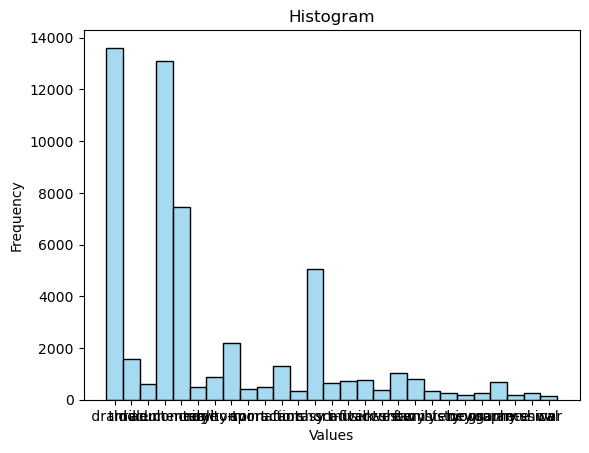

In [43]:
import seaborn as sns

# Creating histogram
sns.histplot(training_data['GENRE'], bins=5, kde=False, color='skyblue')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show plot
plt.show()


## 2. Tokenization
### From the above visualization of the dataset we can understand the description of the movies can be used to predict the Genre of the movies. So lets tokenize it for sentiment analysis

In [8]:
import re
from nltk import word_tokenize

In [9]:
def tokenize_description(description):
    # Lowercase the description
    description = description.lower()
    # Remove non-alphanumeric characters
    description = re.sub(r'[^a-zA-Z0-9\s]', '', description)
    # Tokenize the description
    word_tokens = word_tokenize(description)
    # Join the tokens back into a string
    description = ' '.join(word_tokens)
    return description

In [10]:
training_data['TokenizedData'] = training_data['DESCRIPTION'].apply(tokenize_description)
test_data['TokenizedData'] = test_data['DESCRIPTION'].apply(tokenize_description)

In [11]:
training_data.head()

,TITLE,GENRE,DESCRIPTION,TokenizedData
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening in to a conversation between his doc...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,a brother and sister with a past incestuous re...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,as the bus empties the students for their fiel...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,to help their unemployed father make ends meet...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,the films title refers not only to the unrecov...


In [12]:
test_data.head()

,TITLE,DESCRIPTION,TokenizedData
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",lr brane loves his life his car his apartment ...
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march 1964 quico is a very naughty child...
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year in the life of albin and his family o...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",his father has died he hasnt spoken with his b...
5,Er nu zhai (1955),Before he was known internationally as a mart...,before he was known internationally as a marti...


## 3. VECTORIZATION OF DATA

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(training_data['TokenizedData'])
TFIDF_model = vectorizer.transform(training_data['TokenizedData'])
TFIDF_model_test = vectorizer.transform(test_data['TokenizedData'])

## saving the vectorizer for further use

In [14]:
import joblib
vectorizer_name = 'Genre_vectorizer'
joblib.dump(vectorizer,vectorizer_name)

['Genre_vectorizer']

# 4. Model selection and Training of the model

In [15]:
from sklearn.model_selection import train_test_split
y = training_data['GENRE']
X_train, X_test, Y_train, Y_test = train_test_split(TFIDF_model, y, test_size= 0.25, random_state=12)

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Create and train the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, Y_train)

# Predict on the test set
y_pred_nb = nb_classifier.predict(X_test)

# Calculate accuracy and classification report
accuracy_nb = accuracy_score(Y_test, y_pred_nb)
report_nb = classification_report(Y_test, y_pred_nb)

print("Multinomial Naive Bayes Accuracy:", accuracy_nb)
print("Classification Report for Multinomial Naive Bayes:\n", report_nb)


Multinomial Naive Bayes Accuracy: 0.4469529290246422
Classification Report for Multinomial Naive Bayes:
                precision    recall  f1-score   support

      action        0.00      0.00      0.00       342
       adult        0.00      0.00      0.00       136
   adventure        0.00      0.00      0.00       208
   animation        0.00      0.00      0.00       140
   biography        0.00      0.00      0.00        67
      comedy        0.42      0.02      0.04      1864
       crime        0.00      0.00      0.00       130
 documentary        0.55      0.90      0.68      3334
       drama        0.38      0.89      0.53      3402
      family        0.00      0.00      0.00       164
     fantasy        0.00      0.00      0.00        77
   game-show        0.00      0.00      0.00        49
     history        0.00      0.00      0.00        54
      horror        0.00      0.00      0.00       542
       music        0.00      0.00      0.00       203
     musical  

In [19]:
'''
nmodel_name = 'MultinomialNB_Genre_Model'
joblib.dump(nb_classifier,nmodel_name)
'''

['MultinomialNB_Genre_Model']

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train the K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, Y_train)

# Predict on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Calculate accuracy and classification report
accuracy_knn = accuracy_score(Y_test, y_pred_knn)
report_knn = classification_report(Y_test, y_pred_knn)

print("K-Nearest Neighbors Accuracy:", accuracy_knn)
print("Classification Report for K-Nearest Neighbors:\n", report_knn)


K-Nearest Neighbors Accuracy: 0.4228272096797993
Classification Report for K-Nearest Neighbors:
                precision    recall  f1-score   support

      action        0.17      0.21      0.19       342
       adult        0.27      0.27      0.27       136
   adventure        0.21      0.15      0.18       208
   animation        0.11      0.06      0.08       140
   biography        0.06      0.03      0.04        67
      comedy        0.30      0.27      0.28      1864
       crime        0.05      0.02      0.02       130
 documentary        0.54      0.73      0.62      3334
       drama        0.41      0.59      0.49      3402
      family        0.17      0.05      0.08       164
     fantasy        0.18      0.03      0.05        77
   game-show        0.52      0.61      0.56        49
     history        0.50      0.02      0.04        54
      horror        0.44      0.27      0.34       542
       music        0.60      0.28      0.38       203
     musical        0.

In [20]:
'''
kmodel_name = 'knn_Genre_Model'
joblib.dump(knn_classifier,kmodel_name)
'''

['knn_Genre_Model']

In [40]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
import time

SVC = SVC(kernel='linear')


start_time_svc = time.time()
SVC.fit(X_train,Y_train)
end_time_svc = time.time()

y_pred = SVC.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
report = classification_report(Y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

print("Time taken for training:", end_time_svc - start_time_svc, "seconds")

Accuracy: 0.6012985096650435
Classification Report:
                precision    recall  f1-score   support

      action        0.54      0.33      0.41       342
       adult        0.67      0.40      0.50       136
   adventure        0.68      0.21      0.32       208
   animation        0.70      0.10      0.17       140
   biography        0.00      0.00      0.00        67
      comedy        0.55      0.60      0.57      1864
       crime        0.33      0.02      0.03       130
 documentary        0.68      0.87      0.77      3334
       drama        0.55      0.79      0.65      3402
      family        0.53      0.10      0.16       164
     fantasy        0.20      0.01      0.02        77
   game-show        0.81      0.43      0.56        49
     history        0.00      0.00      0.00        54
      horror        0.69      0.58      0.63       542
       music        0.73      0.43      0.54       203
     musical        0.50      0.02      0.03        61
     myster

In [41]:
'''
model_name = 'SVC_Genre_Model'
joblib.dump(SVC,model_name)
'''

['SVC_Genre_Model']

# 5. PREDICTION OF TEST DATASET FOR GENRE
### I will be using SVC model to predict the GENRE since it has higher accuracy compared to other Models.

In [42]:
Test_predict = SVC.predict(TFIDF_model_test)

In [44]:
Test_predict

array([' drama ', ' drama ', ' documentary ', ..., ' comedy ', ' drama ',
       ' documentary '], dtype=object)

In [45]:
test_data['GENRE']= Test_predict

In [46]:
test_data.head()

,TITLE,DESCRIPTION,TokenizedData,GENRE
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",lr brane loves his life his car his apartment ...,drama
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march 1964 quico is a very naughty child...,drama
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year in the life of albin and his family o...,documentary
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",his father has died he hasnt spoken with his b...,drama
5,Er nu zhai (1955),Before he was known internationally as a mart...,before he was known internationally as a marti...,drama


### COMPARISTION WITH SOLUTION DATA

In [47]:
test_df_sol = pd.read_csv('test_data_solution.txt', sep=":::", names=["TITLE", "GENRE", "DESCRIPTION"])

In [48]:
test_df_sol.head()


,TITLE,GENRE,DESCRIPTION
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [50]:
test_sol = test_df_sol['GENRE']

In [51]:
accuracy = accuracy_score(test_sol, Test_predict)
report = classification_report(test_sol, Test_predict)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.5953321033210333
Classification Report:
                precision    recall  f1-score   support

      action        0.48      0.32      0.38      1314
       adult        0.63      0.35      0.45       590
   adventure        0.63      0.19      0.29       775
   animation        0.58      0.09      0.15       498
   biography        0.00      0.00      0.00       264
      comedy        0.54      0.59      0.56      7446
       crime        0.32      0.02      0.04       505
 documentary        0.68      0.87      0.76     13096
       drama        0.55      0.78      0.64     13612
      family        0.55      0.10      0.17       783
     fantasy        0.44      0.03      0.06       322
   game-show        0.89      0.59      0.71       193
     history        0.00      0.00      0.00       243
      horror        0.67      0.59      0.63      2204
       music        0.69      0.48      0.57       731
     musical        0.50      0.01      0.03       276
     myster